In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import math
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing
# cross_validation is deprecated, use "model_selection"
# import sklearn.model_selection

Exploring the Data

In [2]:
df = pd.read_csv(r'C:\Users\d3583\OneDrive\Documents\PESU\Data-Analytics-Project\KaggleCompetition\train.csv')
# print(df.describe())
print(df.tail(5))
#  High & Low tell us about the volatility 

            Date        Open        High         Low     Volume       Close
1495  23-07-2021  299.658540  301.995035  298.400415   71447400  301.675507
1496  26-07-2021  301.096392  304.211720  299.958083   72434100  302.534241
1497  27-07-2021  302.793811  302.973565  295.664509  104818600  298.100861
1498  28-07-2021  294.186727  298.500271  289.653510  118931200  294.526215
1499  29-07-2021  293.947087  297.661523  293.727415   56699500  295.844238


In [3]:
# finding duplicates
dup_df = df[df.duplicated()]
print("no of duplicate rows", dup_df.shape)
print(dup_df)
# find null values
print(df.isnull().sum())
# shape etc
print(df.dtypes)
print(df.shape)


df.dropna(inplace=True)

no of duplicate rows (0, 6)
Empty DataFrame
Columns: [Date, Open, High, Low, Volume, Close]
Index: []
Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64
Date       object
Open      float64
High      float64
Low       float64
Volume      int64
Close     float64
dtype: object
(1500, 6)


In [4]:
df['HLDiff'] = (df['High'] - df['Low'])

In [5]:
df = df[['Date','Open','HLDiff','Volume', 'Close']]
print(df)

            Date        Open    HLDiff     Volume       Close
0     14-08-2015   57.484790  1.055938  171718000   58.237720
1     17-08-2015   58.274453  0.987075  163538800   58.788651
2     18-08-2015   58.453501  0.656519  138242800   58.485638
3     19-08-2015   58.301997  0.844750  193146000   57.801575
4     20-08-2015   57.374601  1.248764  274006400   56.718082
...          ...         ...       ...        ...         ...
1495  23-07-2021  299.658540  3.594621   71447400  301.675507
1496  26-07-2021  301.096392  4.253637   72434100  302.534241
1497  27-07-2021  302.793811  7.309056  104818600  298.100861
1498  28-07-2021  294.186727  8.846761  118931200  294.526215
1499  29-07-2021  293.947087  3.934108   56699500  295.844238

[1500 rows x 5 columns]


In [19]:
df['DaysSince'] = np.arange(df['Date'].size)
x = np.arange(df['Date'].size)
# print(df)
Xdf = df[['Open', 'Volume', 'HLDiff',  'DaysSince']]
fit = np.polyfit(x, df['Close'], deg=1)
print('y = ',fit[0],'x+',fit[1])

y =  0.1426517855065736 x+ 11.11673165602973


In [20]:
# fit_function = np.poly1d(fit)

# #Time series data plot
# # plot the prediction
# plt.plot(df['Date'], fit_function(x), 'b')
# # plot the actual train values
# plt.plot(df['Date'], df['Close'], 'g')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.title('Stock Close Price')
# print('hi')
# plt.show()

# print(fit_function(x))

In [21]:
print(df['Date'].size)

1500


In [23]:
df['DaysSince'] = np.arange(df['Date'].size)
Xdf = df[['Open', 'Volume', 'HLDiff', 'DaysSince']]
print(Xdf)
X = Xdf.to_numpy()
print(X)
y = df['Close'].to_numpy()
print(len(X), len(y))
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
print(x_train)

            Open     Volume    HLDiff  DaysSince
0      57.484790  171718000  1.055938          0
1      58.274453  163538800  0.987075          1
2      58.453501  138242800  0.656519          2
3      58.301997  193146000  0.844750          3
4      57.374601  274006400  1.248764          4
...          ...        ...       ...        ...
1495  299.658540   71447400  3.594621       1495
1496  301.096392   72434100  4.253637       1496
1497  302.793811  104818600  7.309056       1497
1498  294.186727  118931200  8.846761       1498
1499  293.947087   56699500  3.934108       1499

[1500 rows x 4 columns]
[[5.74847899e+01 1.71718000e+08 1.05593751e+00 0.00000000e+00]
 [5.82744525e+01 1.63538800e+08 9.87074740e-01 1.00000000e+00]
 [5.84535005e+01 1.38242800e+08 6.56519130e-01 2.00000000e+00]
 ...
 [3.02793811e+02 1.04818600e+08 7.30905630e+00 1.49700000e+03]
 [2.94186727e+02 1.18931200e+08 8.84676140e+00 1.49800000e+03]
 [2.93947087e+02 5.66995000e+07 3.93410810e+00 1.49900000e+03]]
150

In [24]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [25]:
print(x_test)

[[8.76306511e+01 8.97384000e+07 6.65680760e-01 6.02000000e+02]
 [1.34048940e+02 8.73888000e+07 9.22656900e-01 1.06900000e+03]
 [1.54964035e+02 1.15215200e+08 1.58263550e+00 1.19000000e+03]
 ...
 [1.44024115e+02 3.20605600e+08 6.44921960e+00 1.14100000e+03]
 [5.37908741e+01 1.29777600e+08 9.64229050e-01 1.51000000e+02]
 [9.77643245e+01 2.04136800e+08 3.18294800e+00 9.05000000e+02]]


In [26]:
y_prediction =  LR.predict(x_test)
print(len(y_prediction), len(y_test))

300 300


In [13]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ',score)
print("MSE is ",mean_squared_error(y_test,y_prediction))
print("RMSE error of is ",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9989440615788491
MSE is  5.096983062984333
RMSE error of is  2.2576498982314184


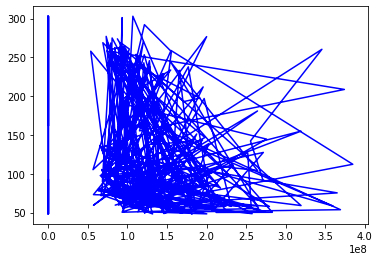

In [14]:
plt.plot(x_test, y_prediction, 'b')
# plt.plot(df['Date'], df['Close'], 'b')
plt.show()
# print(len(y_prediction), len(df['Date']))